This contains various visuals regaurding 2016 and 2017 opportunity youth data.

In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
DBNAME = "opportunity_youth"
conn = psycopg2.connect(dbname=DBNAME)


def get_oy_db():
    #fetching oportunity youth in south king county
    skc_OY_df = pd.read_sql('''
        SELECT *
        FROM pums_2017
        WHERE puma SIMILAR TO '1161(0|1|2|3|4|5)'
        AND agep >= 16
        AND agep <= 24
        AND sch = '1'
        AND esr SIMILAR TO '%(3|6)%'
        ''', conn)
    
    return skc_OY_df

def get_all_youth_db():
    #fetching all residents from south king county within the OY age group

    skc_allRes_df = pd.read_sql('''
        SELECT *
        FROM pums_2017
        WHERE puma SIMILAR TO '1161(0|1|2|3|4|5)'
        AND agep >= 16
        AND agep <= 24
        ''', conn)
    
    return skc_allRes_df

def get_oy_2016_db():
    
    #fetching all opportunity youth from south king county in 2016
    
    csv_file_name = 'ss16pwa.csv'
    oy_2016_df = pd.read_csv(csv_file_name)
    puma_mask = oy_2016_df['PUMA'].isin(['11610', '11611', '11612', '11613', '11614', '11615'])
    oy_2016_df = oy_2016_df.loc[puma_mask]
    oy_mask = (oy_2016_df['AGEP'] >= 16) & (oy_2016_df['AGEP'] <= 24) & (oy_2016_df['SCH'].isin(['1'])) & (oy_2016_df['ESR'].isin(['3', '6']))
    oy_2016_df = oy_2016_df.loc[oy_mask]
    return oy_2016_df


def get_skc_oy_race():
    '''
    returns a dictionary with race names as keys and their coresponding pop_count as values
    '''
    skc_OY_df = get_oy_db()
    
    race_dict = {'1': 'White', '2': 'Black/ African American',
                 '3': 'American Indian or Alaska Native', '4': 'American Indian or Alaska Native',
                 '5': 'American Indian or Alaska Native', '6': 'Asian', '7': 'Native Hawaian/ Pacific Islander',
                 '8': 'Other', '9': 'Two or More Races'}
    race_breakdown = skc_OY_df.groupby(by='rac1p').sum()['pwgtp']
    out_dict = {}
    for index in race_breakdown.index:
        if index in ['4', '5']:
            out_dict[race_dict[index]] += race_breakdown[index]
        else:
            out_dict[race_dict[index]] = race_breakdown[index]
    return out_dict


def get_skc_all_youth_race():
    '''
    returns a dictionary with race names as keys and their coresponding pop_count as values for all skc youth
    '''
    skc_allRes_df = get_all_youth_db()
    
    race_dict = {'1': 'White', '2': 'Black/ African American',
                 '3': 'American Indian or Alaska Native', '4': 'American Indian or Alaska Native',
                 '5': 'American Indian or Alaska Native', '6': 'Asian', '7': 'Native Hawaian/ Pacific Islander',
                 '8': 'Other', '9': 'Two or More Races'}
    race_breakdown = skc_allRes_df.groupby(by='rac1p').sum()['pwgtp']
    out_dict = {}
    for index in race_breakdown.index:
        if index in ['4', '5']:
            out_dict[race_dict[index]] += race_breakdown[index]
        else:
            out_dict[race_dict[index]] = race_breakdown[index]
    return out_dict


def get_pums_youth_count():
    '''
    returns a dictionary with puma ID number as keys and their corresponding total youth count as values
    '''
    skc_all_youth_df = get_all_youth_db()
    
    puma_breakdown = skc_all_youth_df.groupby(by='puma').sum()['pwgtp']
    return puma_breakdown.to_dict()


def get_pums_oy_count():
    '''
    returns a dictionary with puma ID number as keys and their corresponding opportunity youth count as values
    '''
    skc_oy_df = get_oy_db()
    
    puma_breakdown = skc_oy_df.groupby(by='puma').sum()['pwgtp']
    return puma_breakdown.to_dict()
 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
youth_by_race = get_skc_all_youth_race()

In [4]:
youth_by_race

{'White': 45663.0,
 'Black/ African American': 8920.0,
 'American Indian or Alaska Native': 961.0,
 'Asian': 13328.0,
 'Native Hawaian/ Pacific Islander': 1877.0,
 'Other': 7298.0,
 'Two or More Races': 7836.0}

In [5]:
oy_by_race = get_skc_oy_race()

In [6]:
oy_by_race

{'White': 5269.0,
 'Black/ African American': 1315.0,
 'American Indian or Alaska Native': 347.0,
 'Asian': 1189.0,
 'Native Hawaian/ Pacific Islander': 373.0,
 'Other': 965.0,
 'Two or More Races': 1156.0}

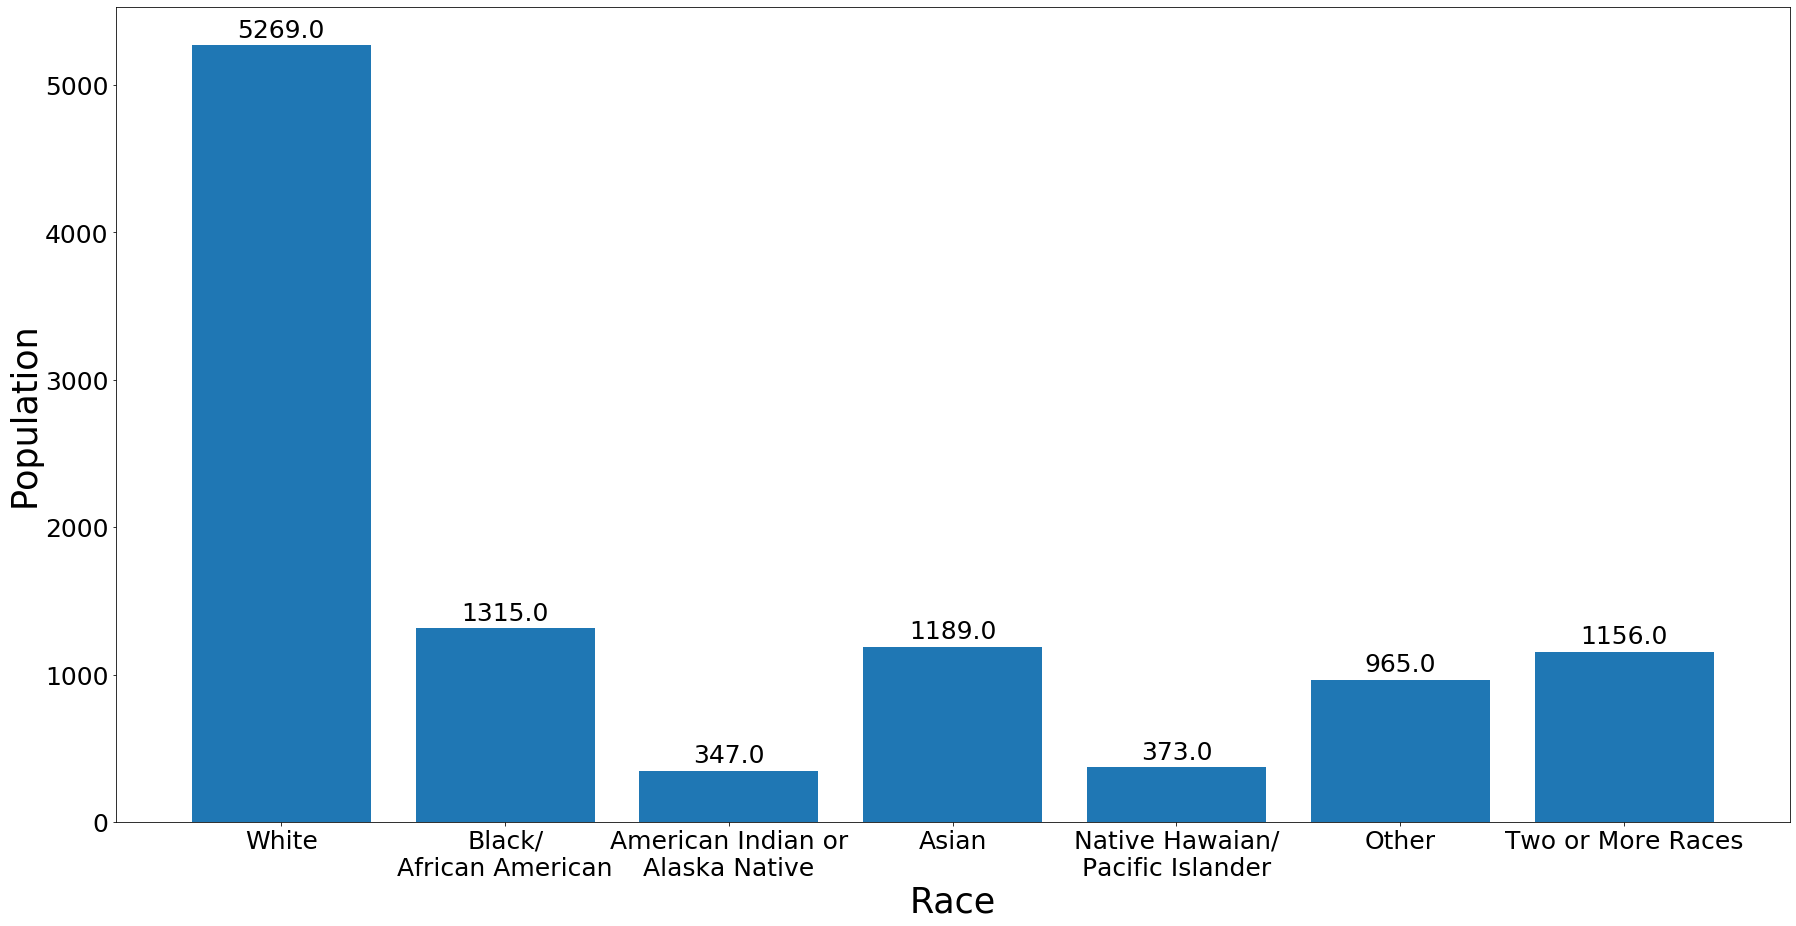

In [7]:
labels = ['White', 'Black/\nAfrican American', 'American Indian or\nAlaska Native', 
          'Asian', 'Native Hawaian/\nPacific Islander', 'Other', 'Two or More Races']

fig, ax =plt.subplots(figsize=(30, 15))
rect=plt.bar(x=labels, height=oy_by_race.values())
plt.xlabel('Race', fontsize=35)
plt.ylabel('Population', fontsize=35)
#plt.title('Opportunity Youth By Race in 2017', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
#plt.rcParams['figure.figsize'] = (30,10)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height().round(1)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=25)
autolabel(rect)
plt.show()
fig.savefig('OY_Race_2017.png')

In [8]:
print(oy_by_race['White']/sum(oy_by_race.values()) * 100)
print(youth_by_race['White']/sum(youth_by_race.values()) * 100)

49.64198228754475
53.168845988146664


In [9]:
oy_percent_by_race


NameError: name 'oy_percent_by_race' is not defined

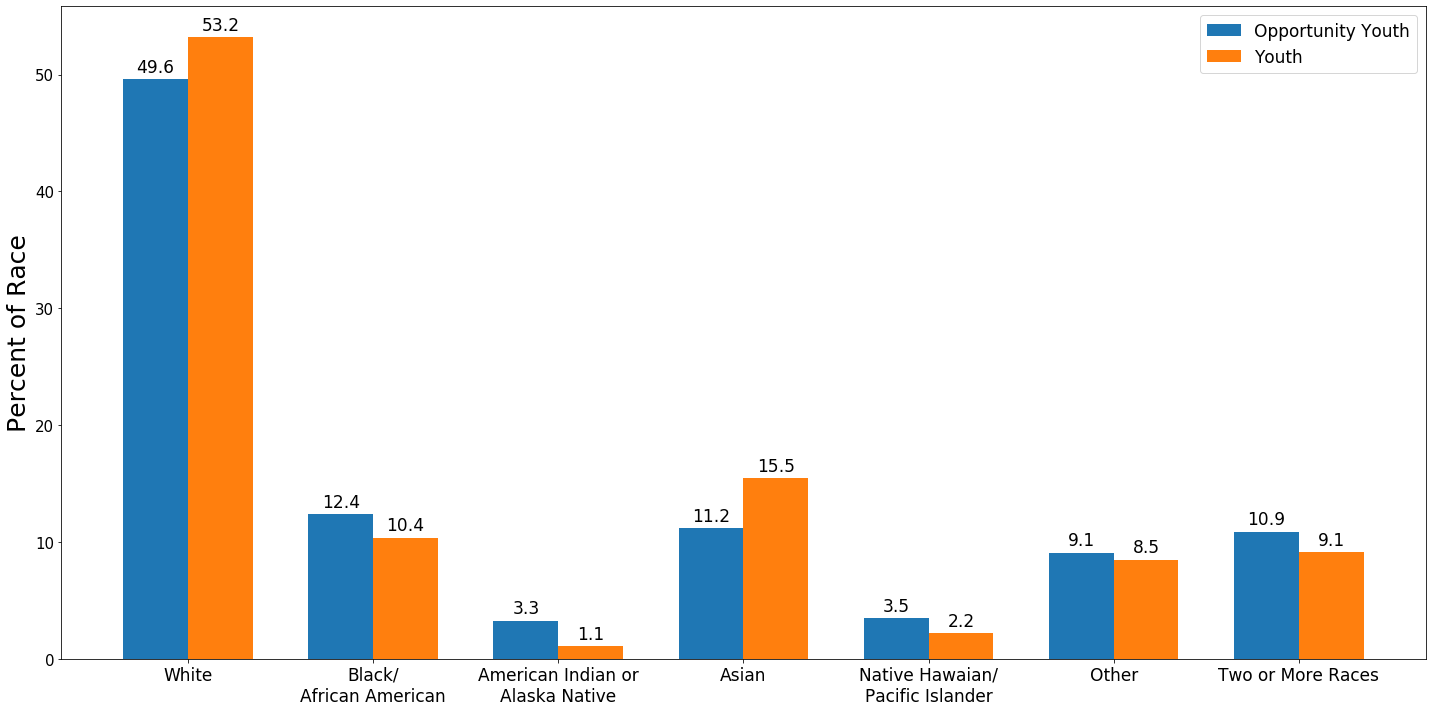

<Figure size 432x288 with 0 Axes>

In [10]:
labels = ['White', 'Black/\nAfrican American', 'American Indian or\nAlaska Native', 
          'Asian', 'Native Hawaian/\nPacific Islander', 'Other', 'Two or More Races']

oy_percent_by_race = [(oy_by_race['White']/sum(oy_by_race.values())) * 100,
                      (oy_by_race['Black/ African American']/sum(oy_by_race.values())) * 100,
                      (oy_by_race['American Indian or Alaska Native']/sum(oy_by_race.values())) * 100,
                      (oy_by_race['Asian']/sum(oy_by_race.values())) * 100,
                      (oy_by_race['Native Hawaian/ Pacific Islander']/sum(oy_by_race.values())) * 100,
                      (oy_by_race['Other']/sum(oy_by_race.values())) * 100,
                      (oy_by_race['Two or More Races']/sum(oy_by_race.values())) * 100]

youth_percent_by_race = [(youth_by_race['White']/sum(youth_by_race.values())) * 100,
                         (youth_by_race['Black/ African American']/sum(youth_by_race.values())) * 100,
                         (youth_by_race['American Indian or Alaska Native']/sum(youth_by_race.values())) * 100,
                         (youth_by_race['Asian']/sum(youth_by_race.values())) * 100,
                         (youth_by_race['Native Hawaian/ Pacific Islander']/sum(youth_by_race.values())) * 100,
                         (youth_by_race['Other']/sum(youth_by_race.values())) * 100,
                         (youth_by_race['Two or More Races']/sum(youth_by_race.values())) * 100]

x = np.arange(len(labels))
width = 0.35 

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, oy_percent_by_race, width, label='Opportunity Youth')
rects2 = ax.bar(x + width/2, youth_percent_by_race, width, label='Youth')

ax.set_ylabel('Percent of Race', fontsize=25)
plt.yticks(fontsize=15)
#ax.set_title('Opportunity Youth % By Race vs Youth % By Race in 2017', fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=17)
ax.legend(fontsize=17)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height().round(1)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=17)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('OY_Race_vs_Y_Race.png', dpi=100)

In [11]:
skc_oy_race = get_skc_oy_race()

In [12]:
sum(skc_oy_race.values())

10614.0

In [20]:
oy_in_skc = get_oy_db()

In [21]:
oy_in_skc_16_to_18_2017 = oy_in_skc.loc[(oy_in_skc['agep'] >= 16) & (oy_in_skc['agep'] <= 18)]
sum(oy_in_skc_16_to_18_2017['pwgtp'])

oy_in_skc_19_to_21_2017 = oy_in_skc.loc[(oy_in_skc['agep'] >= 19) & (oy_in_skc['agep'] <= 21)]
sum(oy_in_skc_19_to_21_2017['pwgtp'])

oy_in_skc_22_to_24_2017 = oy_in_skc.loc[(oy_in_skc['agep'] >= 22) & (oy_in_skc['agep'] <= 24)]
sum(oy_in_skc_22_to_24_2017['pwgtp'])

4897.0

In [22]:
def get_oy_2016_db():
    
    #fetching all opportunity youth from south king county in 2016
    
    csv_file_name = 'csv_pwa/ss16pwa.csv'
    oy_2016_df = pd.read_csv(csv_file_name)
    puma_mask = oy_2016_df['PUMA'].isin(['11610', '11611', '11612', '11613', '11614', '11615'])
    oy_2016_df = oy_2016_df.loc[puma_mask]
    oy_mask = (oy_2016_df['AGEP'] >= 16) & (oy_2016_df['AGEP'] <= 24) & (oy_2016_df['SCH'].isin(['1'])) & (oy_2016_df['ESR'].isin(['3', '6']))
    oy_2016_df = oy_2016_df.loc[oy_mask]
    return oy_2016_df

In [23]:
oy_in_skc_16 = get_oy_2016_db()

FileNotFoundError: [Errno 2] File csv_pwa/ss16pwa.csv does not exist: 'csv_pwa/ss16pwa.csv'

In [24]:
oy_in_skc_16.head()

NameError: name 'oy_in_skc_16' is not defined

In [17]:
oy_in_skc_16_to_18_2016 = oy_in_skc_16.loc[(oy_in_skc_16['AGEP'] >= 16) & (oy_in_skc_16['AGEP'] <= 18)]
sum(oy_in_skc_16_to_18_2016['PWGTP'])

oy_in_skc_19_to_21_2016 = oy_in_skc_16.loc[(oy_in_skc_16['AGEP'] >= 19) & (oy_in_skc_16['AGEP'] <= 21)]
sum(oy_in_skc_19_to_21_2016['PWGTP'])

oy_in_skc_22_to_24_2016 = oy_in_skc_16.loc[(oy_in_skc_16['AGEP'] >= 22) & (oy_in_skc_16['AGEP'] <= 24)]
sum(oy_in_skc_22_to_24_2016['PWGTP'])

NameError: name 'oy_in_skc_16' is not defined

In [18]:
x1 = [2016, 2017]
y1 = [sum(oy_in_skc_16_to_18_2016['PWGTP']), sum(oy_in_skc_16_to_18_2017['pwgtp'])]

x2 = [2016, 2017]
y2 = [sum(oy_in_skc_19_to_21_2016['PWGTP']), sum(oy_in_skc_19_to_21_2017['pwgtp'])]

x3 = [2016, 2017]
y3 = [sum(oy_in_skc_22_to_24_2016['PWGTP']), sum(oy_in_skc_22_to_24_2017['pwgtp'])]

fig, (ax) = plt.subplots(figsize=(15,9))
ax.plot(x1, y1, label='16-18', linewidth=5)
ax.plot(x2, y2, label='19-21', linewidth=5)
ax.plot(x3, y3, label='22-24', linewidth=5)
#ax.set_title('Comparison of Opportunity Youth by Age Group', fontsize=20)
ax.set_xlabel('Year', fontsize='17')
ax.set_xticks(np.arange(2016, 2018, step=1))
plt.xticks(fontsize=25)
plt.yticks(fontsize=20)
ax.set_ylabel('Number of Opportunity Youth', fontsize='17')
ax.legend(prop={'size':15})
plt.show()

plt.show()
fig.savefig('OY_by_age_16_vs_17.png')

NameError: name 'oy_in_skc_16_to_18_2016' is not defined

In [19]:
labels = ['2016', '2017']

y = [sum(oy_in_skc_16_to_18_2016['PWGTP']), sum(oy_in_skc_16_to_18_2017['pwgtp'])]
z = [sum(oy_in_skc_19_to_21_2016['PWGTP']), sum(oy_in_skc_19_to_21_2017['pwgtp'])]
k = [sum(oy_in_skc_22_to_24_2016['PWGTP']), sum(oy_in_skc_22_to_24_2017['pwgtp'])]

x = np.arange(len(labels))        

fig = plt.figure(figsize=(20, 10))
ax = plt.subplot()
ax.bar(x-0.2, y, width=0.15, align='center', label='Ages 16-18')
ax.bar(x, z, width=0.15, align='center', label='Ages 19-21')
ax.bar(x+0.2, k, width=0.15, align='center', label='Ages 22-24')
#ax.set_title('Comparison of Opportunity Youth by Age Group', fontsize=20)
ax.set_xlabel('Year', fontsize='17')
ax.set_ylabel('Number of Opportunity Youth', fontsize='17')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=17)
ax.legend()

plt.show()
fig.savefig('OY_17_vs_16.png')

NameError: name 'oy_in_skc_16_to_18_2016' is not defined